In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-population-dataset/world_population.csv
/kaggle/input/world-population-dataset/List of the Countries and Territories.txt


# (Plotly) EDA of World Population
We will explore using Plotly to conduct an EDA on the data.
Some of the items we will explore:
1. Plotly Express
2. Plotly Graph Object
3. Interactive choropleth with animation slider
5. Multiple choropleths

In [3]:
wp_df = pd.read_csv('../input/world-population-dataset/world_population.csv')
wp_df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


# Cleaning the dataframes
1. Checking for unique and null values
2. Renaming,sorting the columns
3. Overview of top 10 countries by population
4. Overview of Continents

In [4]:
uniques = wp_df.nunique() #234 unique countries
nulls = wp_df.isnull().sum() #no null values
dtypes = wp_df.dtypes #appropriate data types

summary_df = pd.concat([uniques, nulls, dtypes],axis = 1)
summary_df.columns = ['Unique Values', 'Null Values', 'Data Types']
summary_df


,Unique Values,Null Values,Data Types
Rank,234,0,int64
CCA3,234,0,object
Country,234,0,object
Capital,234,0,object
Continent,6,0,object
2022 Population,234,0,int64
2020 Population,234,0,int64
2015 Population,234,0,int64
2010 Population,234,0,int64
2000 Population,234,0,int64


# Overview of top 10 Countries by Population
* China, India, and USA lead the world population in percentage'
* Pakistan, Nigeria and Bangladesh have the highest growth rates
* Density is really high in India and Bangladesh

In [5]:
wp_df.columns = ['Rank','ISO-3','Country','Capital','Continent','2022','2020','2015',
                 '2010','2000','1990','1980','1970','Area (km²)','Density (per km²)','Growth Rate',
                 'World Population Percentage']
wp_df = wp_df[['Rank','ISO-3','Country','Capital','Continent', 'Area (km²)','Density (per km²)',
              'Growth Rate', 'World Population Percentage','2022','2020','2015','2010','2000','1990',
              '1980','1970']]
rank = wp_df['Rank'] <=10
top10_df = wp_df[rank]
top10_df = top10_df.sort_values(by='Rank')
top10_df.style.background_gradient()

,Rank,ISO-3,Country,Capital,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,2022,2020,2015,2010,2000,1990,1980,1970
41,1,CHN,China,Beijing,Asia,9706961,146.893300,1.000000,17.880000,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450
92,2,IND,India,New Delhi,Asia,3287590,431.067500,1.006800,17.770000,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301
221,3,USA,United States,"Washington, D.C.",North America,9372610,36.093500,1.003800,4.240000,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340
93,4,IDN,Indonesia,Jakarta,Asia,1904569,144.652900,1.006400,3.450000,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394
156,5,PAK,Pakistan,Islamabad,Asia,881912,267.401800,1.019100,2.960000,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872
149,6,NGA,Nigeria,Abuja,Africa,923768,236.575900,1.024100,2.740000,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264
27,7,BRA,Brazil,Brasilia,South America,8515767,25.284100,1.004600,2.700000,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875
16,8,BGD,Bangladesh,Dhaka,Asia,147570,1160.035000,1.010800,2.150000,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860
171,9,RUS,Russia,Moscow,Europe,17098242,8.463600,0.997300,1.810000,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010
131,10,MEX,Mexico,Mexico City,North America,1964375,64.908200,1.006300,1.600000,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306


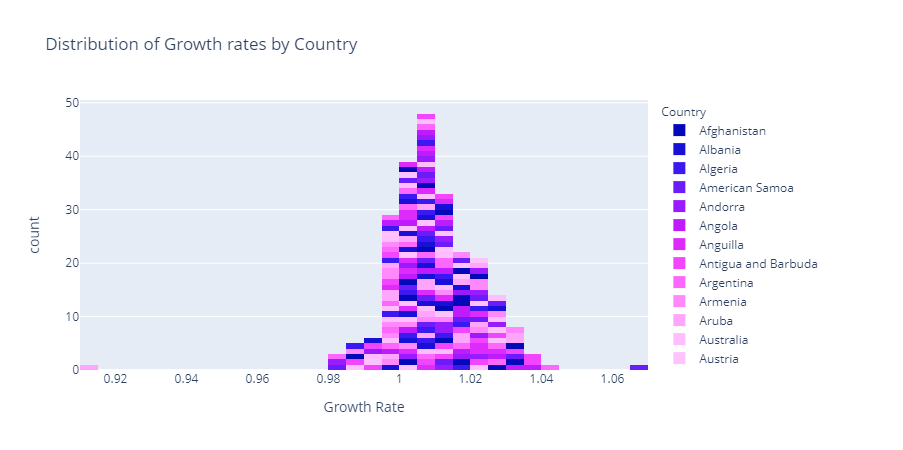

In [39]:
fig = px.histogram(wp_df, x="Growth Rate", color = 'Country', 
                   color_discrete_sequence = px.colors.sequential.Plotly3,
                   title= 'Distribution of Growth rates by Country')
fig.show()

# Overview of Continent Population Growth over the years
1. Groupby Continent.
2. Plotly Area plot

In [15]:
format_dic = {
    'Africa': '{:,}',
    'Asia': '{:,}',
    'Europe': '{:,}',
    'North America': '{:,}',
    'Oceania': '{:,}',
    'South America': '{:,}'
}

wp_df_gb = wp_df[['Continent', '1970','1980','1990','2000',
                  '2010','2015','2020','2022']]
wp_df_gb = wp_df_gb.groupby('Continent')
wp_df_gb = wp_df_gb.sum()
wp_df_gb = wp_df_gb.T
(wp_df_gb
 .style
 .background_gradient(vmin = 0, vmax = 1000000000)
 .format(format_dic)
)

Continent,Africa,Asia,Europe,North America,Oceania,South America
1970,"365,444,348","2,144,906,290","655,923,991","315,434,606","19,480,270","192,947,156"
1980,"481,536,377","2,635,334,228","692,527,159","368,293,361","22,920,240","241,789,006"
1990,"638,150,629","3,210,563,577","720,320,797","421,266,425","26,743,822","297,146,415"
2000,"818,946,032","3,735,089,604","726,093,423","486,069,584","31,222,778","349,634,282"
2010,"1,055,228,072","4,220,041,327","735,613,934","542,720,651","37,102,764","393,078,250"
2015,"1,201,102,442","4,458,250,182","741,535,608","570,383,850","40,403,283","413,134,396"
2020,"1,360,671,810","4,663,086,535","745,792,196","594,236,593","43,933,426","431,530,043"
2022,"1,426,730,932","4,721,383,274","743,147,538","600,296,136","45,038,554","436,816,608"


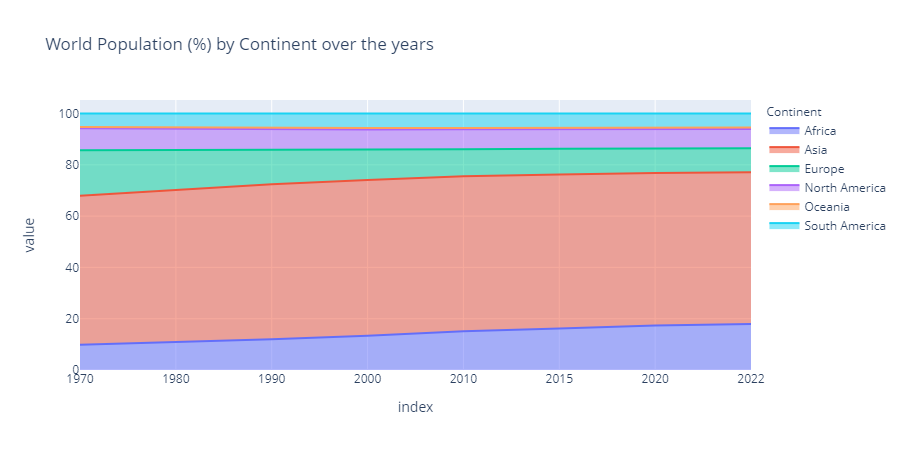

In [7]:
fig = px.area(wp_df_gb, title='World Population (%) by Continent over the years', groupnorm='percent')
fig.show()

# 1. Plotly Express Choropleth
This is the fast and simpler version to use, however there is limited functionality and customisation.

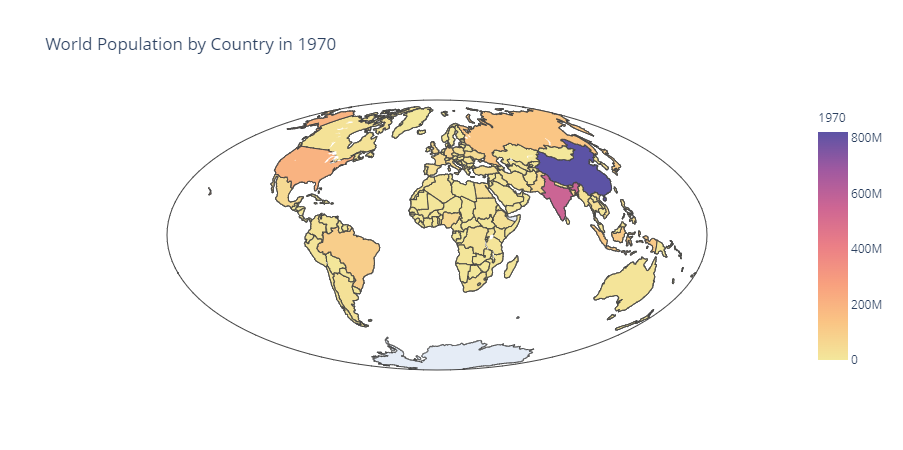

In [8]:
fig = px.choropleth(wp_df, locations = 'ISO-3',  
                    color = '1970', #select the population values
                    locationmode="ISO-3", #identify geolocation of countries using ISO-3
                    scope="world",
                    title = 'World Population by Country in 1970', 
                    hover_name="Country", #add hover title
                    hover_data = {'1970': False, #add or remove hover data
                                  'World Population Percentage':True,
                                  'Growth Rate':True,'Area (km²)':True,
                                  'Density (per km²)':True,'ISO-3':False,},
                    projection = 'hammer', #standard projection type is 'equirectangular'
                    color_continuous_scale=px.colors.sequential.Sunset)
 
fig.show()

# 2. Plotly Graph Object (go.Choropleth)
More customisation to create a clean and sleek choropleth.

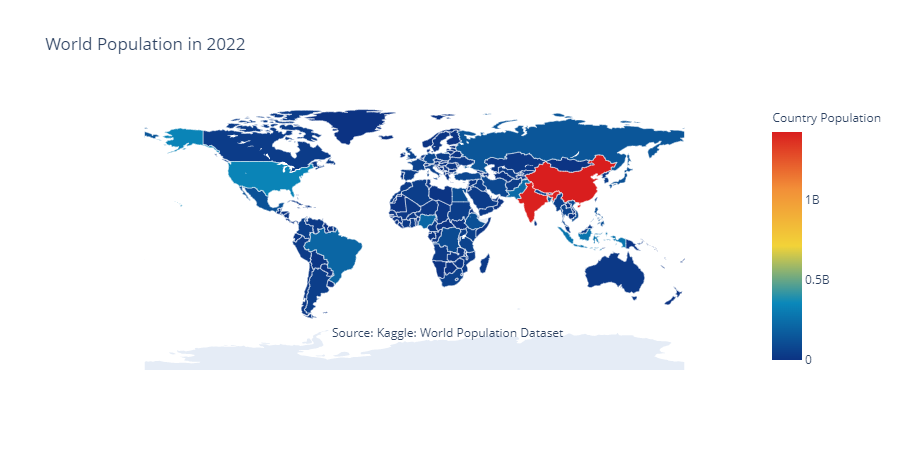

In [9]:
df = pd.DataFrame()
#convert floats to str in a temporary df
for col in wp_df.columns:
    df[col] = wp_df[col].astype(str)

#formatting the hovertext input as a df
df['text'] = df['Country'] + '<br>' + \
            'World Population Percentage : ' + df['World Population Percentage'] + '<br>' + \
            'Growth Rate : ' + df['Growth Rate']

fig = go.Figure(data=go.Choropleth(
    locations = wp_df['ISO-3'],#using ISO-3 country codes
    z = wp_df['2022'], #data
    text = df['text'], #hovertext
    colorscale = 'Portland',
    marker_line_color='white',
    marker_line_width=0.5,
    colorbar_title = 'Country Population',
))

fig.update_layout(
    title_text='World Population in 2022',
    geo=dict(
        showframe=False, #removing the squareframe is much sleek
        showcoastlines=False, #so is removing the coastlines
        projection_type='equirectangular' #the standard map projection
    ),
    #geo_scope = 'asia', #used to set the scope of the map, activate this to focus on asia only
    annotations = [dict(
        x=0.55, #set the coordinates for the source reference
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset">Kaggle: World Population Dataset</a>',
        showarrow = False
    )]
)

fig.show()

# 3. Choropleth with Animation Frames
# Preparing the data
1. First, use pandas melt function to create a year column
2. Next, use Plotly Express again, but include 'year' as animation_frame

In [10]:
wp_df_years = wp_df[['ISO-3','Country','1970','1980','1990','2000','2010','2015','2020','2022']]
print("Before Melting")
display(wp_df_years.head())
wp_df_melted = wp_df_years.melt(id_vars=["ISO-3", "Country"], var_name="Year", value_name="Population")
print("After Melting")
wp_df_melted.head(10)

Before Melting


,ISO-3,Country,1970,1980,1990,2000,2010,2015,2020,2022
0,AFG,Afghanistan,10752971,12486631,10694796,19542982,28189672,33753499,38972230,41128771
1,ALB,Albania,2324731,2941651,3295066,3182021,2913399,2882481,2866849,2842321
2,DZA,Algeria,13795915,18739378,25518074,30774621,35856344,39543154,43451666,44903225
3,ASM,American Samoa,27075,32886,47818,58230,54849,51368,46189,44273
4,AND,Andorra,19860,35611,53569,66097,71519,71746,77700,79824


After Melting


,ISO-3,Country,Year,Population
0,AFG,Afghanistan,1970,10752971
1,ALB,Albania,1970,2324731
2,DZA,Algeria,1970,13795915
3,ASM,American Samoa,1970,27075
4,AND,Andorra,1970,19860
5,AGO,Angola,1970,6029700
6,AIA,Anguilla,1970,6283
7,ATG,Antigua and Barbuda,1970,64516
8,ARG,Argentina,1970,23842803
9,ARM,Armenia,1970,2534377


**Note:**
1. range_color is important, This is the fix the scale and avoid uto-scaling for each frame, adjusted themax scale down, otherwise only China and India will be visible due to the huge disparity in population compared to other nations.
2. animation_frame has been added

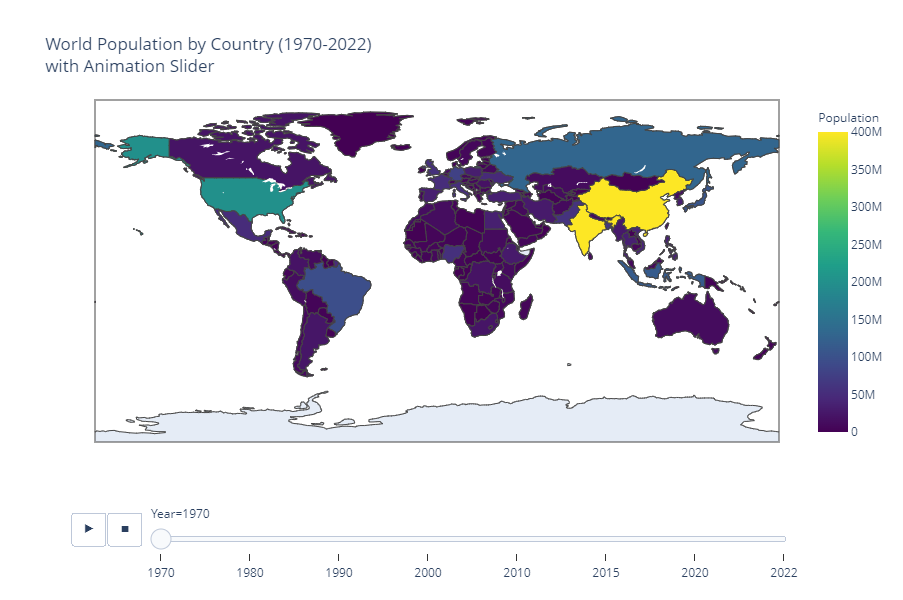

In [11]:
fig = px.choropleth(wp_df_melted, locations = 'ISO-3', color = 'Population', 
                    locationmode="ISO-3", scope="world", width = 800, height = 600,
                    title = 'World Population by Country (1970-2022) <br>with Animation Slider', 
                    hover_name="Country",
                    hover_data = {'ISO-3':False,},
                    projection = 'equirectangular',
                    range_color=(0, 400000000), #to fix the scale
                    animation_frame='Year', #added new column as the animation frame
                    color_continuous_scale=px.colors.sequential.Viridis)
 
fig.show()

# 4. Multiple Choropleths

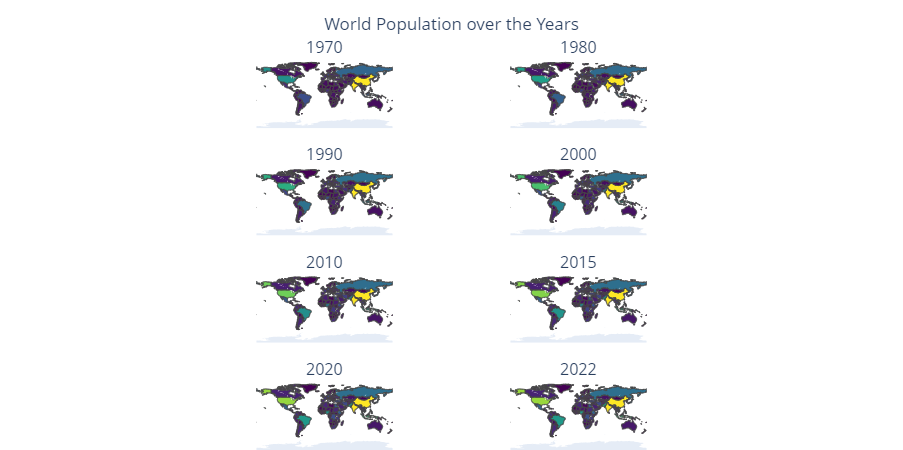

In [12]:
years = ['1970','1980','1990','2000','2010','2015','2020','2022']
rows = 4
cols = 2

#to create a 4 x 2 array
specs = [[{'type':'choropleth'} for n in np.arange(cols)] for i in np.arange(rows)] 

fig = make_subplots(rows=rows, cols=cols, 
                    specs = specs,
                    subplot_titles = years, vertical_spacing=0.1, horizontal_spacing=0.01)              

for n, year in enumerate(years):
    fig.add_trace(go.Choropleth(locations= wp_df['ISO-3'],
                                z = wp_df[year],
                                text = df['text'],
                                locationmode = 'ISO-3',
                                colorscale='viridis',
                                zmin = 0, zmax = 400000000,
                                hoverinfo='z+text'),
                                row = n//cols+1, col = n%cols+1)
    
fig.update_layout(title={'text':'World Population over the Years', 'xanchor':'center','x':0.5},
                 coloraxis_showscale=False, margin={'r':200,'t':60,'l':200,'b':0},
                  geo1={'showframe':False, 'showcoastlines':False},
                  geo2={'showframe':False, 'showcoastlines':False},
                  geo3={'showframe':False, 'showcoastlines':False},
                  geo4={'showframe':False, 'showcoastlines':False},
                  geo5={'showframe':False, 'showcoastlines':False},
                  geo6={'showframe':False, 'showcoastlines':False},
                  geo7={'showframe':False, 'showcoastlines':False},
                  geo8={'showframe':False, 'showcoastlines':False}
                 )

fig.update_traces(showscale=False)
fig.show()